In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv(r"E:\PGDA 41\Machine Learning\Assignment\11-05-2025\Heart Disease Prediction\heart_disease_prediction.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,68,Female,ATA,107,160,0,LVH,145,Y,4.9,Flat,0
1,58,Male,ASY,193,277,1,LVH,99,N,5.0,Flat,1
2,44,Male,ASY,164,161,0,LVH,90,Y,2.0,Flat,1
3,72,Female,ASY,128,244,0,LVH,103,Y,4.2,Up,1
4,37,Male,ASY,150,315,1,LVH,110,N,4.6,Flat,1


In [5]:
le = LabelEncoder()
cat_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,68,0,1,107,160,0,0,145,1,4.9,1,0
1,58,1,0,193,277,1,0,99,0,5.0,1,1
2,44,1,0,164,161,0,0,90,1,2.0,1,1
3,72,0,0,128,244,0,0,103,1,4.2,2,1
4,37,1,0,150,315,1,0,110,0,4.6,1,1


In [7]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [11]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [13]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [15]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n📌 {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Decision Tree", y_test, y_pred_tree)
evaluate_model("XGBoost", y_test, y_pred_xgb)


📌 Logistic Regression
Accuracy: 0.54
Confusion Matrix:
 [[13 33]
 [13 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.28      0.36        46
           1       0.55      0.76      0.64        54

    accuracy                           0.54       100
   macro avg       0.53      0.52      0.50       100
weighted avg       0.53      0.54      0.51       100


📌 Decision Tree
Accuracy: 0.44
Confusion Matrix:
 [[18 28]
 [28 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.39      0.39        46
           1       0.48      0.48      0.48        54

    accuracy                           0.44       100
   macro avg       0.44      0.44      0.44       100
weighted avg       0.44      0.44      0.44       100


📌 XGBoost
Accuracy: 0.46
Confusion Matrix:
 [[17 29]
 [25 29]]
Classification Report:
               precision    recall  f1-score   support

         

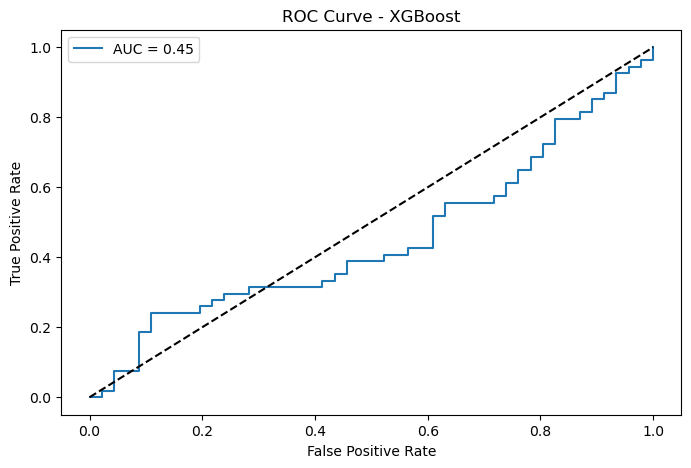

In [17]:
y_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()